# Predicting a continuous variable using regressor models
## Part2 - Find the relationship between X and Y

Like what we had done at the start of the course, the purpose of this notebook is to generate data that we can practice analyzing.

The notebook you should focus on is the 'seek' notebook - as the seek notebook illustrates how regressors can be used to fit the data and generate predictions.

Import the libraries we expect to use

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

np.random.seed(1)

Load the data we generated in the 'hide' notebook.

In [77]:
df = pd.read_csv('week09-generated-data.csv')
df.head(10)

,input,target
0,-7.30,2.451483e+05
1,-130.15,2.324013e+06
2,-106.01,9.672982e+05
3,-9.99,-3.043995e+05
4,-10.06,-1.013953e+06
5,-11.73,3.055883e+05
6,-14.25,-1.741598e+05
7,-39.65,1.386264e+05
8,-44.41,3.382260e+05
9,-102.22,6.748891e+05


Seperate out the input m(X) and the target (y)

In [78]:
X=df[['input']]
y=df[['target']]

## Explore the given data

Often we will do much more than this, but at least look at things using a scatterplot

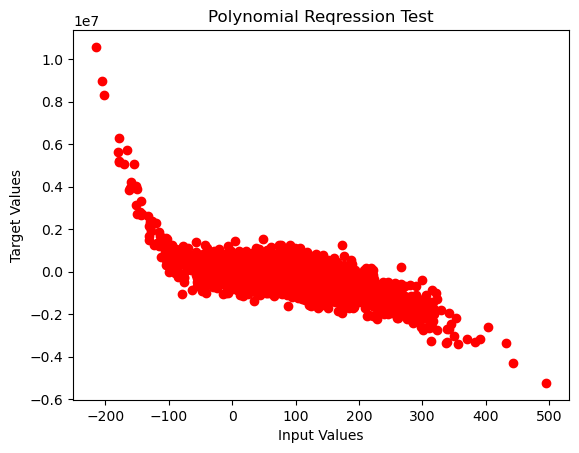

In [79]:
plt.scatter(X,y,color='red')
plt.title('Polynomial Reqression Test')
plt.xlabel('Input Values')
plt.ylabel('Target Values')
plt.show()

In [80]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [81]:
# Rescale the data using skleans standard scaler
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

y_scaler = scaler.fit(y_train)
y_train = y_scaler.transform(y_train)
y_test = y_scaler.transform(y_test)

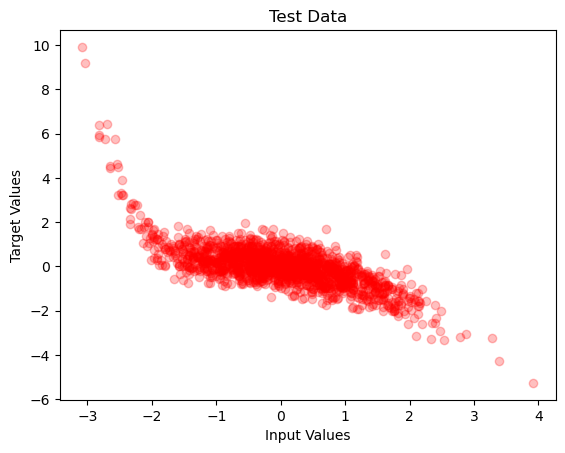

In [82]:
plt.scatter(X_train,y_train,color='red',alpha=0.25)
plt.xlabel('Input Values')
plt.ylabel('Target Values')
plt.title('Test Data')
plt.show()

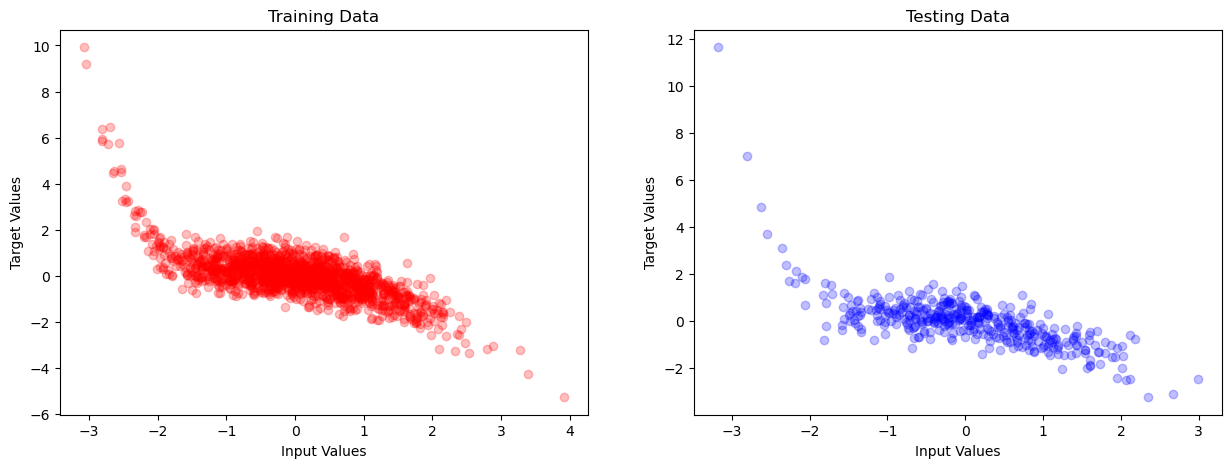

In [83]:
# create a side by side plot of the training and testing data

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.scatter(X_train,y_train,color='red',alpha=0.25)
ax1.set_xlabel('Input Values')
ax1.set_ylabel('Target Values')
ax1.set_title('Training Data')

ax2.scatter(X_test,y_test,color='blue',alpha=0.25)
ax2.set_xlabel('Input Values')
ax2.set_ylabel('Target Values')
ax2.set_title('Testing Data')
plt.show()

## Fit the data using a linear regression model with second order polynomial features

Fit the linear regression model to the dataset

Create the features (that is, x and x^2) for the linear regression. Then do all the analysis we did above again.

In [84]:
poly_reg=PolynomialFeatures(degree=3)
X_train_poly=poly_reg.fit_transform(X_train)
X_test_poly=poly_reg.fit_transform(X_test)


Fit this model to the polynomial features...

In [85]:
lin_reg2=LinearRegression().fit(X_train_poly,y_train)
y_train_pred=lin_reg2.predict(X_train_poly)
y_test_pred=lin_reg2.predict(X_test_poly)


In [86]:
X_train.shape

(1600, 1)

In [87]:
y_train.shape

(1600, 1)

In [88]:
y_train_pred.shape

(1600, 1)

Explore the results visually...

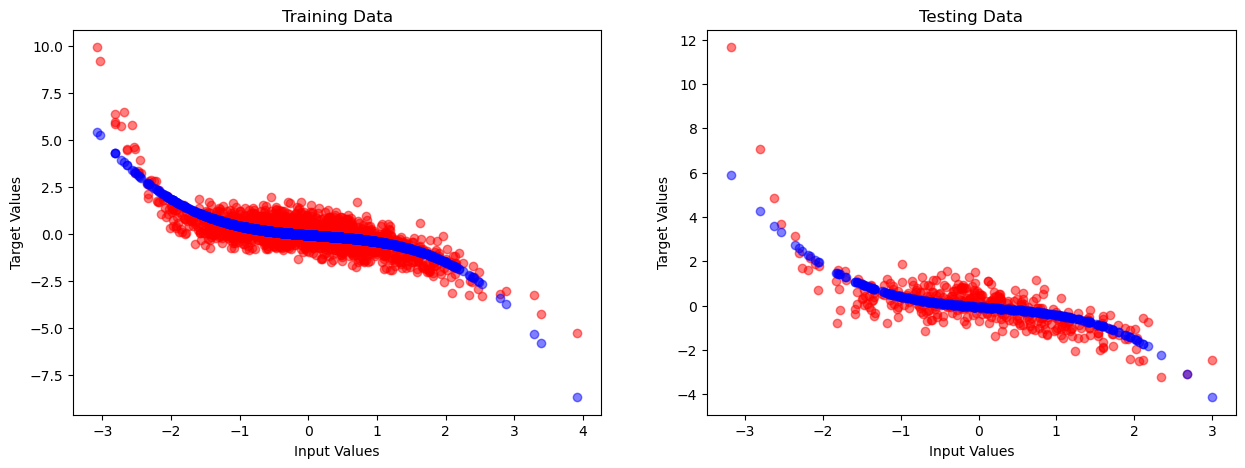

In [89]:
# create a side by side plot of the training and testing data

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.scatter(X_train, y_train, color='red', alpha=0.5)
ax1.set_xlabel('Input Values')
ax1.set_ylabel('Target Values')
ax1.set_title('Training Data')

ax1.scatter(X_train, y_train_pred, color='blue', alpha=0.5)

ax2.scatter(X_test,y_test,color='red',alpha=0.5)
ax2.set_xlabel('Input Values')
ax2.set_ylabel('Target Values')
ax2.set_title('Testing Data')

ax2.scatter(X_test,y_test_pred,color='blue',alpha=0.5)

plt.show()

In [90]:
rmse_3poly = mean_squared_error(y_test, y_test_pred)**(1/2)
rmse_3poly

0.6633816806020295

## KNN Regression


In [91]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)


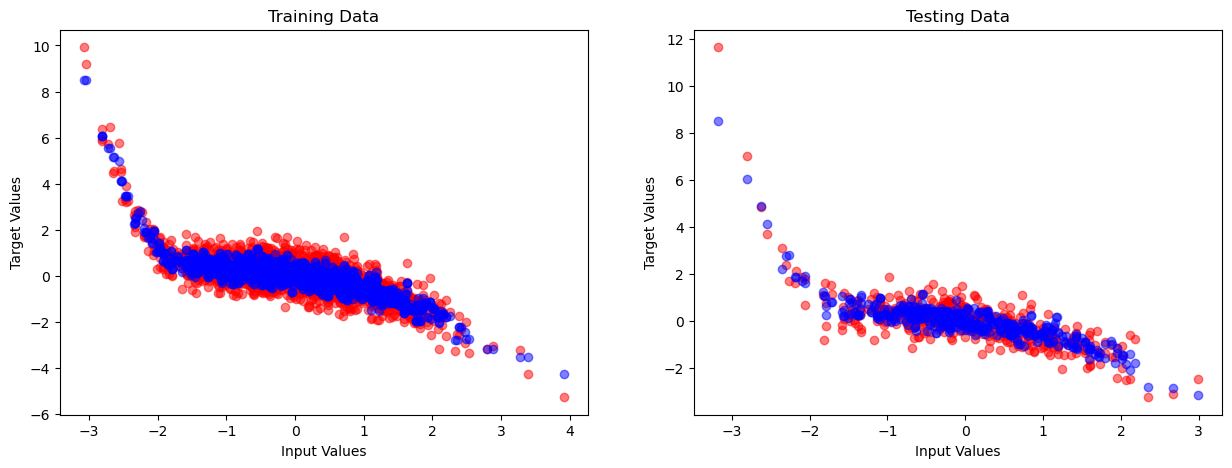

In [92]:
# create a side by side plot of the training and testing data

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.scatter(X_train, y_train, color='red', alpha=0.5)
ax1.set_xlabel('Input Values')
ax1.set_ylabel('Target Values')
ax1.set_title('Training Data')

ax1.scatter(X_train, y_train_pred, color='blue', alpha=0.5)

ax2.scatter(X_test,y_test,color='red',alpha=0.5)
ax2.set_xlabel('Input Values')
ax2.set_ylabel('Target Values')
ax2.set_title('Testing Data')

ax2.scatter(X_test,y_test_pred,color='blue',alpha=0.5)

plt.show()

In [93]:
rmse_knn = mean_squared_error(y_test, y_test_pred)**(1/2)
rmse_knn

0.6223191363335532

This is a signifianct improvement over the linear models above, and does a better job at fitting the data.

## XGBoost regression

In [94]:
xgb = XGBRegressor(random_state=1)
xgb.fit(X_train, y_train)
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

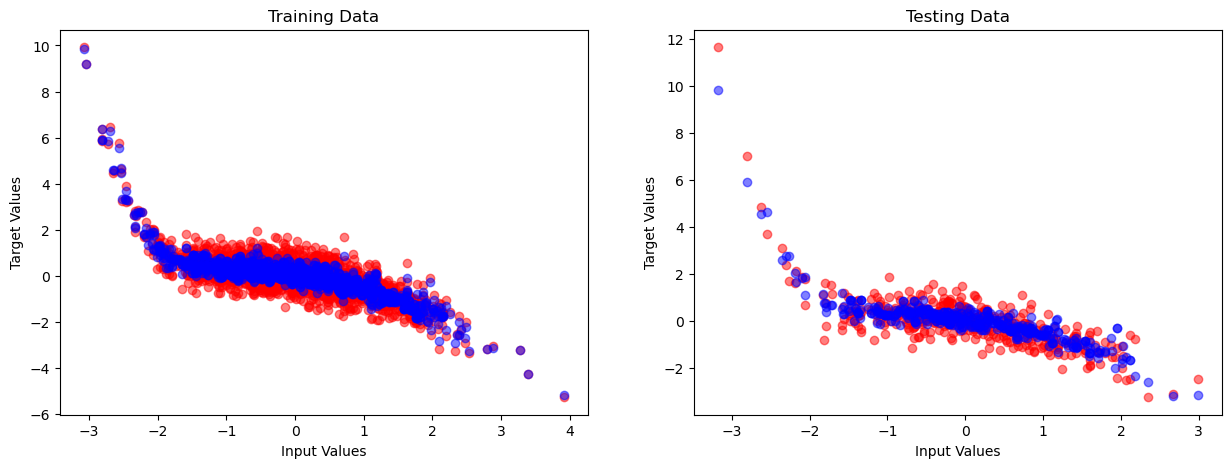

In [95]:
# create a side by side plot of the training and testing data

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.scatter(X_train, y_train, color='red', alpha=0.5)
ax1.set_xlabel('Input Values')
ax1.set_ylabel('Target Values')
ax1.set_title('Training Data')

ax1.scatter(X_train, y_train_pred, color='blue', alpha=0.5)

ax2.scatter(X_test,y_test,color='red',alpha=0.5)
ax2.set_xlabel('Input Values')
ax2.set_ylabel('Target Values')
ax2.set_title('Testing Data')

ax2.scatter(X_test,y_test_pred,color='blue',alpha=0.5)

plt.show()

In [96]:
rmse_xgb = mean_squared_error(y_test, y_test_pred)**(1/2)
rmse_xgb

0.5937549338612925

This is even better than the knn model at fitting the data.

## Neural Networks for regression

In [97]:
ann = MLPRegressor(hidden_layer_sizes=(500,200,100,10), max_iter=1000)
ann.fit(X_train, y_train)
y_train_pred = ann.predict(X_train)
y_test_pred = ann.predict(X_test)

c:\Users\tcsmi\miniconda3\envs\dm\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


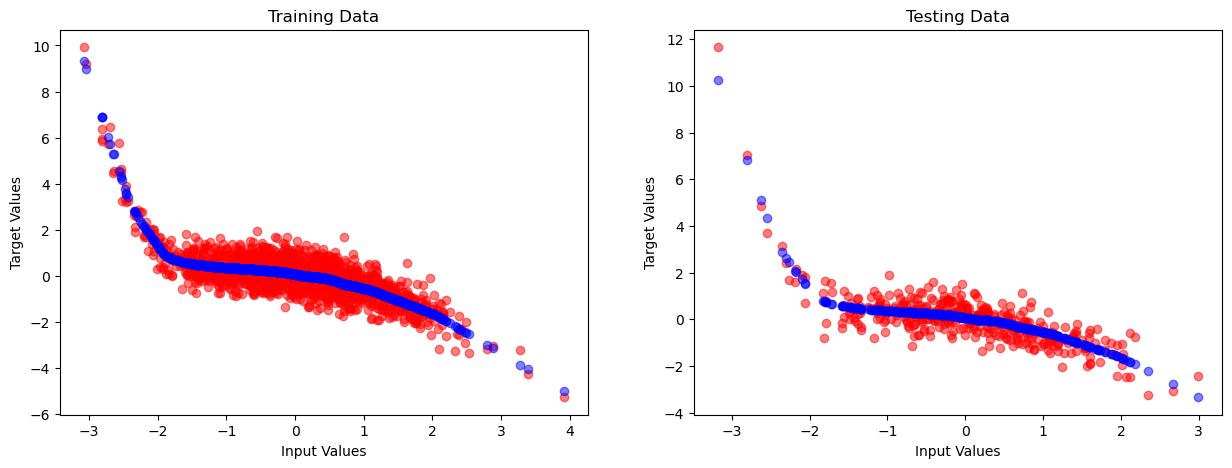

In [98]:
# create a side by side plot of the training and testing data

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.scatter(X_train, y_train, color='red', alpha=0.5)
ax1.set_xlabel('Input Values')
ax1.set_ylabel('Target Values')
ax1.set_title('Training Data')

ax1.scatter(X_train, y_train_pred, color='blue', alpha=0.5)

ax2.scatter(X_test,y_test,color='red',alpha=0.5)
ax2.set_xlabel('Input Values')
ax2.set_ylabel('Target Values')
ax2.set_title('Testing Data')

ax2.scatter(X_test,y_test_pred,color='blue',alpha=0.5)

plt.show()

In [99]:
rmse_ann = mean_squared_error(y_test, y_test_pred)**(1/2)
rmse_ann

0.5288873445634826

## Discussion of Results

This analysis fit the data using a variety of machine learning models. The results are summarized below.

In [100]:
print(f"{'3Poly':7s}: {rmse_3poly:.2f}")
print(f"{'KNN':7s}: {rmse_knn:.2f}")
print(f"{'XGB':7s}: {rmse_xgb:.2f}")
print(f"{'ANN':7s}: {rmse_ann:.2f}")

3Poly  : 0.66
KNN    : 0.62
XGB    : 0.59
ANN    : 0.53


Based on the results, which model would you use to predict the target variable? 

We can determine the 'best' model by identifying which has the best evaluation metric score. For this analysis, we have chosen Root Mean Squared Error. Root Mean Squared error is a common metric used to evaluate the performance of regressor models. The lower the rmse value, the better the predictions are.

Based on this, we find the best model for deployment is the Neural Network model. This model has the lowest RMSE value of 0.53